In [1]:
%matplotlib inline 
from interval import interval
import matplotlib.pyplot as plt
from sympy import(
    init_printing,
    var,
    exp,
    cos,
    sin,
    log,
    expand_log
)

import pylab as plot
params = {
    'legend.fontsize': 20,
    'axes.labelsize': 18,
}
plot.rcParams.update(params)

from sympy.utilities.lambdify import lambdify 
from sympy.plotting import plot
init_printing()
import numpy as np

from ivmat import ivmat as ip
from fmat import fmat
from krawczyk import Krawczyk
from symbol_derivative import(
    get_f_df_ddf_from_symbol_representation,
    get_global_minima_from_f_expr,
    calc_f_expr_meshgrid,
    plot3D,
    visualize_optimization_log,
)
from nelder_mead import NelderMead

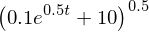

In [2]:
gamma, beta, k, m = args = var("gamma, beta, k, m")
t = var("t")

curve_expr = ((gamma + beta * exp(k * t)) ** m) 
display(curve_expr)
true_curve_expr = curve_expr.subs([(gamma, 10), (beta, 0.1), (k, 0.5), (m, 0.5)])
display(true_curve_expr)


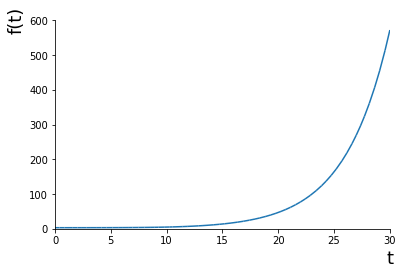

[(0, 3.1780497164141406), (5, 3.3493655214189966), (10, 4.9841063301516417), (15, 13.813190849532425)]


In [3]:
plot(true_curve_expr, (t, 0, 30))
true_curve = lambdify(t, true_curve_expr)
sample_data = [(time, true_curve(time)) for time in np.arange(0, 20, 5)]
print(sample_data)

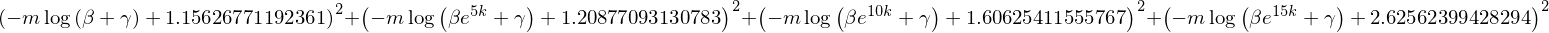

In [4]:
loss_expr = 0
for time, value in sample_data:
    pred_value = curve_expr.subs(t, time)
    value = log(value)
    pred_value = expand_log(log(pred_value), force=True)
    loss_expr += (value - pred_value) ** 2
f_expr = loss_expr
display(f_expr)

seed_num = 431
np.random.seed(seed_num)
low = 0.01
high = 2.5
points = np.random.uniform(low=low, high=high, size=(len(args)+1, len(args)))
np_func = lambdify([args], f_expr, modules=np) 

In [5]:
# points_histories = []
# local_minima = np.inf
# for i in range(30):
#     points = np.random.uniform(low=low, high=high, size=(len(args)+1, len(args)))
#     nelder = NelderMead(np_func, points)
#     _local_minima, points_history = nelder.run(50)
#     points_histories.append(points_history)
#     local_minima = min(local_minima, _local_minima)
# points_histories = np.array(points_histories)
# print local_minima

In [6]:
f, df, ddf = get_f_df_ddf_from_symbol_representation(f_expr, args)

In [7]:

X = ip([
    [interval[9.996, 10.001]],
    [interval[0.0996, 0.10003]],    
    [interval[0.4999, 0.500003]], 
    [interval[0.49999, 0.5000002]]
])

f(X)

In [8]:
kra = Krawczyk(df, ddf, X)

In [9]:
local_minima = 4.47388960416E-11

In [10]:
import time
#local_minima = np.inf
st = time.time()
ans_boxes, S_num_list, T_num_list, U_num_list, animation_box, max_width_time_series_list = kra.find_global_minimum(
    f, tmp_min_sup=local_minima ,trace=True, cnt_max=200000)
print("{}[sec]".format(time.time() - st))

Loop end. cnt:4034, len(S):0, len(T):11, len(U):0

4034
---------- 最終的なS[:10] -----------
[]
---------- 最終的なU[:10] -----------
[]
---------- 最終的なT[:50] -----------
[[[interval([9.999999999927955, 10.000000000076447])],
  [interval([0.09999999999981367, 0.10000000000020066])],
  [interval([0.4999999999990299, 0.5000000000010264])],
  [interval([0.4999999999983914, 0.5000000000015169])]],
 [[interval([9.99999999993216, 10.000000000072308])],
  [interval([0.09999999999982452, 0.10000000000018983])],
  [interval([0.49999999999908634, 0.500000000000971])],
  [interval([0.49999999999847855, 0.5000000000014284])]],
 [[interval([9.999999999932236, 10.00000000007238])],
  [interval([0.09999999999982494, 0.10000000000019003])],
  [interval([0.4999999999990875, 0.5000000000009717])],
  [interval([0.499999999998477, 0.5000000000014267])]],
 [[interval([9.999999999937867, 10.000000000066755])],
  [interval([0.09999999999983995, 0.10000000000017559])],
  [interval([0.49999999999916295, 0.50000000000

In [11]:
if len(args) == 2: 
    visualize_optimization_log(kra, f, animation_box, skip=200)

In [12]:
def fill_zero_to_right_of_list(array):
    max_len = len(max(array, key=len))
    return [li + [0] * (max_len - len(li)) for li in array]

kra = Krawczyk(df, ddf, X)
local_minima_list = [4.47388960416E-11, np.inf]
_S_num_lists = [] # [S_num_list_1, ...]
_max_width_time_series_lists = []
for local_minima in local_minima_list:
    ans_boxes, S_num_list, T_num_list, U_num_list, animation_box, max_width_time_series_list = kra.find_global_minimum(\
        f, tmp_min_sup=local_minima, trace=False, cnt_max=30000, max_width=1e-14)
    _S_num_lists.append(S_num_list)
    _max_width_time_series_lists.append(max_width_time_series_list)
    
_result_list = fill_zero_to_right_of_list(_S_num_lists)
result_list = np.array(_result_list).T

tmp_list = fill_zero_to_right_of_list(_max_width_time_series_lists)
max_width_time_series_lists = np.array(tmp_list).T

Loop end. cnt:4034, len(S):0, len(T):11, len(U):0

4034
---------- 最終的なS[:10] -----------
[]
---------- 最終的なU[:10] -----------
[]
---------- 最終的なT[:50] -----------
[[[interval([9.999999999927955, 10.000000000076447])],
  [interval([0.09999999999981367, 0.10000000000020066])],
  [interval([0.4999999999990299, 0.5000000000010264])],
  [interval([0.4999999999983914, 0.5000000000015169])]],
 [[interval([9.99999999993216, 10.000000000072308])],
  [interval([0.09999999999982452, 0.10000000000018983])],
  [interval([0.49999999999908634, 0.500000000000971])],
  [interval([0.49999999999847855, 0.5000000000014284])]],
 [[interval([9.999999999932236, 10.00000000007238])],
  [interval([0.09999999999982494, 0.10000000000019003])],
  [interval([0.4999999999990875, 0.5000000000009717])],
  [interval([0.499999999998477, 0.5000000000014267])]],
 [[interval([9.999999999937867, 10.000000000066755])],
  [interval([0.09999999999983995, 0.10000000000017559])],
  [interval([0.49999999999916295, 0.50000000000

[<matplotlib.text.Text at 0x11331a8d0>, <matplotlib.text.Text at 0x113325bd0>]

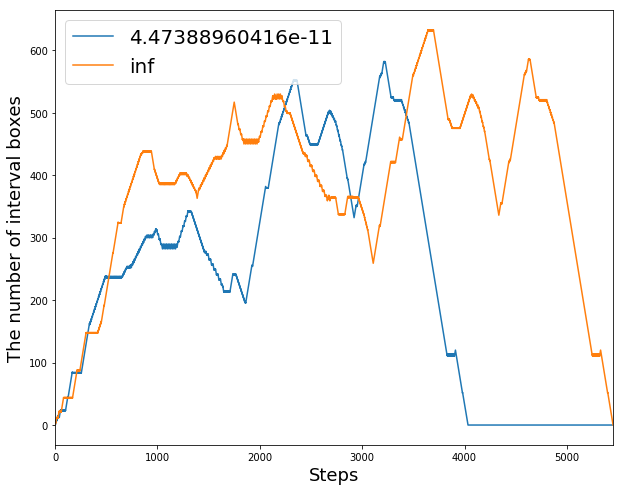

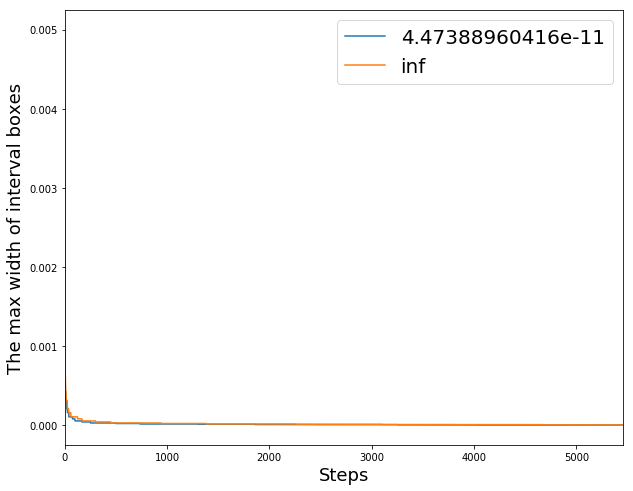

In [13]:
import pandas as pd
result_df = pd.DataFrame(np.array(result_list))
result_df.columns = list(map(str, local_minima_list))
ax = result_df.plot(title='', figsize=(10, 8), legend=True)
ax.set(xlabel="Steps", ylabel="The number of interval boxes")


max_width_df = pd.DataFrame(max_width_time_series_lists)
max_width_df.columns = list(map(str, local_minima_list))
ax = max_width_df.plot(title='', figsize=(10, 8), legend=True)
ax.set(xlabel="Steps", ylabel="The max width of interval boxes")